## 1. 문제 정의
어떤 특징을 갖는 사람이 생존할지를 예측하는 문제

## 2. 데이터 읽어오기

### * 캐글에서 받게되는 파일의 구성
- train.csv - 예측 모델을 만들기 위해 사용하는 학습셋
- test.csv - 예측 모델을 이용하여 예측할 탑승객 정보가 담긴 테스트셋
- sampleSubmission.csv - 제출시 사용할 수 있는 csv 파일

In [1]:
import pandas as pd

train = pd.read_csv('data/train.csv', index_col = 0)
test = pd.read_csv('data/test.csv', index_col = 0)

## 3. 데이터 확인

In [2]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df1 = pd.DataFrame([survived,dead])    
    sum = survived.add(dead, fill_value = 0)
    df2 = pd.DataFrame({"Survived": survived, "Dead": dead})
    df3 = pd.DataFrame({"Survived": survived/sum, "Dead": dead/sum})
    df1.index = ['Survived','Dead']        
    df1.plot(kind='barh',stacked=True, figsize=(10,2)); plt.ylabel('Survived'); plt.show()
    df2.plot(kind='barh',stacked=True, figsize=(10,2)); plt.ylabel(feature); plt.show()            
    df3.plot(kind='barh',stacked=True, figsize=(10,2)); plt.ylabel(feature+'(%)'); plt.show()                

In [4]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4. Feature engineering

### 4.1 숫자가 아닌 데이터를 숫자로 맵핑

In [5]:
train_test_data = train, test
def map_col(col, mapping_info):
    for dataset in train_test_data:
        dataset[col] = dataset[col].map(mapping_info)

In [6]:
map_col('Sex', {"male": 0, "female": 1})
map_col('Embarked', {"S": 0, "C": 1, "Q": 2})

In [7]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


### 4.2 Name

In [8]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [9]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Jonkheer      1
Lady          1
Countess      1
Ms            1
Don           1
Mme           1
Sir           1
Name: Title, dtype: int64

#### Title map
- Mr : 0  
- Miss : 1  
- Mrs: 2  
- Others: 3

In [10]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, 
                 "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, 
                 "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [11]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,0.0,3
888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,0.0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.45,NaN,0.0,1
890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,1.0,0
891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,2.0,0


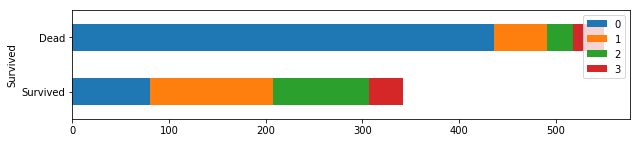

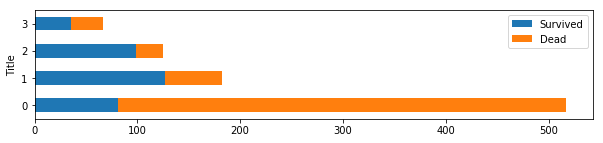

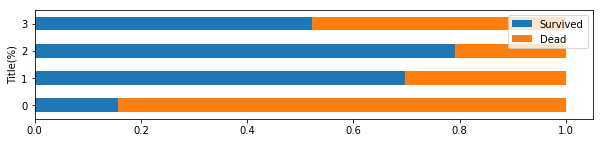

In [12]:
bar_chart('Title')

### 4.3 Age
- 결측값 존재
- Title을 기준으로 중앙값 사용

In [13]:
train['AgeMedian'] = train.groupby("Title")["Age"].transform("median")
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMedian
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0,30.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,35.0
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,21.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,2,35.0
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,30.0
6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0,0,30.0
7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0,0,30.0
8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0.0,3,9.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0.0,2,35.0


In [14]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

#### 나이의 범위에 따라 카데고리화
- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4

In [15]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeMedian
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0,30.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1.0,2,35.0
3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,21.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0.0,2,35.0
5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0.0,0,30.0


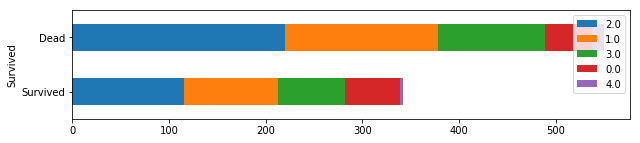

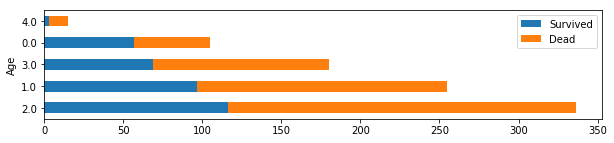

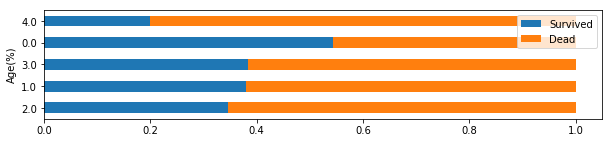

In [16]:
bar_chart('Age')

### 4.4 Embarked
- 결측값 채우기

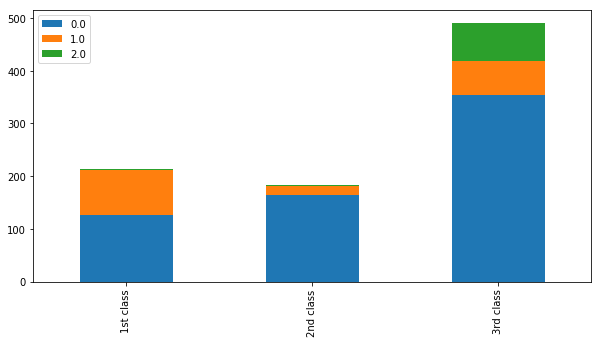

In [17]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3],
    index = ['1st class','2nd class', '3rd class'])
df.plot(kind='bar',stacked=True, figsize=(10,5))

- 많은 수가 S(0)임을 알 수 있음

In [18]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('0')

### 4.5 Fare
- 결측값: Pclass를 기준으로 중앙값으로 채움

In [17]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0
6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,2,0
7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,0,0
8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,0,3
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,0,2


#### 가격 범위에 따라 카데고리화

In [18]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

### 4.6 Cabin

In [22]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F33            3
F2             3
E101           3
C22 C26        3
D              3
B18            2
B51 B53 B55    2
B35            2
D20            2
E25            2
B28            2
C78            2
E24            2
F G73          2
E8             2
D35            2
C2             2
C123           2
C126           2
B58 B60        2
C52            2
E67            2
E121           2
E33            2
D26            2
E44            2
C125           2
              ..
B79            1
E49            1
C86            1
E68            1
A14            1
C32            1
B73            1
E38            1
C106           1
C128           1
C50            1
D45            1
E77            1
D49            1
D11            1
D19            1
C7             1
B86            1
B82 B84        1
D10 D12        1
B30            1
D6             1
E40            1
C82            1
D28            1
C47            1
D50            1
E17           

In [23]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [24]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

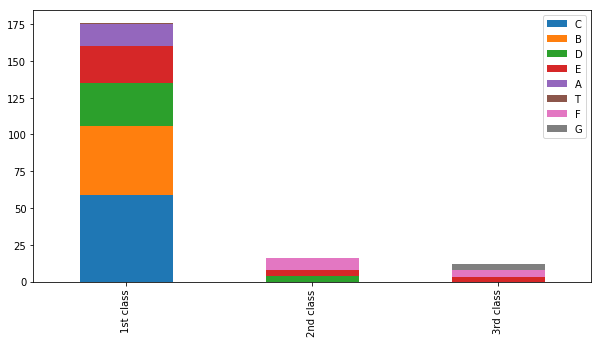

In [21]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [22]:
# scaling하여 mapping
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [23]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.7 FamilySize

In [24]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

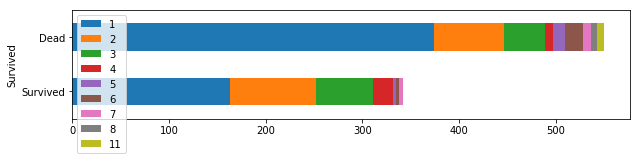

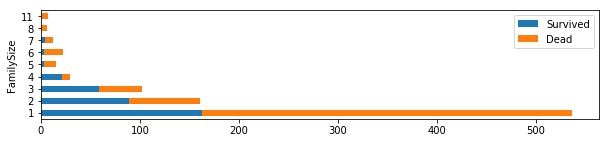

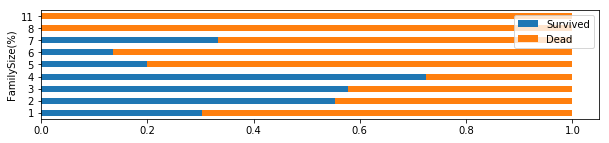

In [25]:
bar_chart('FamilySize')

In [26]:
# scaling
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

### 4.9 범주형 feature를 category로 변경

In [36]:
for feature in ['Sex', 'Embarked', 'Title']:
    train[feature] = train[feature].astype('category')
    test [feature] = test [feature].astype('category')

## 5. 모델 적용

### 종속 변수와 독립 변수 설정

In [37]:
X_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Title', 
              'FamilySize']
X_train = train[X_features]
X_test  = test [X_features]
Y_train = train['Survived']

In [38]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [39]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

def getScore(clf):    
    score = cross_val_score(clf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring='accuracy')
    return score

In [40]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

### 교차 검증

In [56]:
scores = pd.DataFrame([
    getScore(KNeighborsClassifier(n_neighbors = 13)),
    getScore(DecisionTreeClassifier(random_state=0)),
    getScore(RandomForestClassifier(n_estimators=13, random_state=0)),
    getScore(GaussianNB()),
    getScore(SVC(gamma = 'auto'))],
    index = ['KNN', 'DT', 'RF', 'NB', 'SVM'])
scores['Mean'] = np.around(scores.mean(axis = 1)*100, 2)
scores

,0,1,2,3,4,5,6,7,8,9,Mean
KNN,0.822222,0.764045,0.808989,0.831461,0.876404,0.820225,0.853933,0.797753,0.842697,0.842697,82.60
DT,0.766667,0.820225,0.775281,0.775281,0.887640,0.764045,0.820225,0.820225,0.741573,0.797753,79.69
RF,0.811111,0.842697,0.797753,0.786517,0.876404,0.808989,0.820225,0.808989,0.764045,0.820225,81.37
NB,0.855556,0.730337,0.752809,0.752809,0.707865,0.808989,0.764045,0.808989,0.865169,0.831461,78.78
SVM,0.833333,0.808989,0.831461,0.820225,0.842697,0.820225,0.842697,0.853933,0.831461,0.865169,83.50


### 예측

In [45]:
def getPredict(clf):
    clf.fit(X_train, Y_train)
    return clf.predict(X_test)

prediction = pd.DataFrame({
    'KNN': getPredict(KNeighborsClassifier(n_neighbors = 13)),
    'DT' : getPredict(DecisionTreeClassifier()),
    'RF' : getPredict(RandomForestClassifier(n_estimators=13)),
    'NB' : getPredict(GaussianNB()),
    'SVM': getPredict(SVC(gamma = 'auto'))})
prediction.tail()

,KNN,DT,RF,NB,SVM
413,0,0,0,0,0
414,1,1,1,1,1
415,0,0,0,0,0
416,0,0,0,0,0
417,1,1,1,1,1


In [46]:
prediction['Survived'] = (prediction.sum(axis = 1) > 2) * 1

In [50]:
prediction.tail()

,KNN,DT,RF,NB,SVM,Survived
413,0,0,0,0,0,0
414,1,1,1,1,1,1
415,0,0,0,0,0,0
416,0,0,0,0,0,0
417,1,1,1,1,1,1


## 6. Submission

In [48]:
submission = pd.DataFrame({
        "PassengerId": test.index,
        "Survived": prediction['Survived']
    })
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [49]:
submission.to_csv('submission.csv', index=False)